# I.Introduction

A. Brief Overview
 - The Wisconsin Breast Cancer Data Set is a frequently used dataset in machine learning and data mining. It has characteristics associated with breast cancer tumors, which are mostly utilized to categorize tumors as benign or malignant. This dataset, produced by Dr. William H. Wolberg, has contributed greatly to cancer detection and machine learning research.

B. Importance of breast cancer diagnosis and prediction
   - Early detection, improved patient outcomes, reduced mortality, efficient resource allocation, cost savings, psychological support, research advancements, healthcare planning, reducing overdiagnosis, and patient empowerment are all important reasons for breast cancer diagnosis and prediction. These efforts improve patient care, save lives, and advance medical research and public health programs.


# II. Background Information

A. Explanation of the Wisconsin Breast Cancer Data Set
- The Wisconsin Breast Cancer Data Set, also known as the "Breast Cancer Wisconsin (Diagnostic) Data Set," is a dataset created by Dr. William H. Wolberg. It contains attributes related to breast cancer tumor characteristics and is primarily used for binary classification: distinguishing between benign and malignant tumors. The dataset includes features such as clump thickness, cell size, and more, with a target variable indicating tumor class. Researchers use it to develop and evaluate machine learning models for breast cancer diagnosis and treatment.



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import seaborn as sns
import numpy as np 
import warnings
from scipy.stats import norm
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from IPython.display import Image, display
warnings.filterwarnings("ignore")

# III. Data Preprocessing

In [88]:
#Load CSV & Display it
data = pd.read_csv("BreastCancer.csv")
data.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,560,561,562,563,564,565,566,567,568,569
x.radius_mean,13.54,13.08,9.504,13.03,8.196,12.05,13.49,11.76,13.64,11.94,...,24.63,20.47,20.55,14.27,15.22,20.92,21.56,20.13,16.6,20.6
x.texture_mean,14.36,15.71,12.44,18.42,16.84,14.63,22.3,21.6,16.34,18.24,...,21.6,20.67,20.86,22.55,30.62,25.09,22.39,28.25,28.08,29.33
x.perimeter_mean,87.46,85.63,60.34,82.61,51.71,78.04,86.91,74.72,87.21,75.71,...,165.5,134.7,137.8,93.77,103.4,143.0,142.0,131.2,108.3,140.1
x.area_mean,566.3,520.0,273.9,523.8,201.9,449.3,561.0,427.9,571.8,437.6,...,1841.0,1299.0,1308.0,629.8,716.9,1347.0,1479.0,1261.0,858.1,1265.0
x.smoothness_mean,0.09779,0.1075,0.1024,0.08983,0.086,0.1031,0.08752,0.08637,0.07685,0.08261,...,0.103,0.09156,0.1046,0.1038,0.1048,0.1099,0.111,0.0978,0.08455,0.1178
x.compactness_mean,0.08129,0.127,0.06492,0.03766,0.05943,0.09092,0.07698,0.04966,0.06059,0.04751,...,0.2106,0.1313,0.1739,0.1154,0.2087,0.2236,0.1159,0.1034,0.1023,0.277
x.concavity_mean,0.06664,0.04568,0.02956,0.02562,0.01588,0.06592,0.04751,0.01657,0.01857,0.01972,...,0.231,0.1523,0.2085,0.1463,0.255,0.3174,0.2439,0.144,0.09251,0.3514
x.concave_pts_mean,0.04781,0.0311,0.02076,0.02923,0.005917,0.02749,0.03384,0.01115,0.01723,0.01349,...,0.1471,0.1015,0.1322,0.06139,0.09429,0.1474,0.1389,0.09791,0.05302,0.152
x.symmetry_mean,0.1885,0.1967,0.1815,0.1467,0.1769,0.1675,0.1809,0.1495,0.1353,0.1868,...,0.1991,0.2166,0.2127,0.1926,0.2128,0.2149,0.1726,0.1752,0.159,0.2397


In [89]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [90]:
#Checking for Null Values
data.isnull().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [91]:
#Remove x. from start of column names
data.columns = data.columns.str.lstrip('x.')
#Rename y column to diagnosis
data = data.rename(columns={'y': 'diagnosis'})
# Move the 'diagnosis' column to the first index
data = data[['diagnosis'] + [col for col in data.columns if col != 'diagnosis']]
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [92]:
# Save the modified Data to a new CSV file
data.to_csv('modified_BreastCancerEval.csv', index=False)

In [114]:
array = data.values
X = array[:, 1:]
y = array[:, 0]

In [115]:
#Encoding categorical data values
le = LabelEncoder()
y = le.fit_transform(y)

In [116]:
#Split The Data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

### Feature Standardization

In [133]:
# Normalize the  data (center around 0 and scale to remove the variance).
sc = StandardScaler()
X_scale = scaler.fit_transform(X)     

### Feature decomposition

In [123]:
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(X_scale)

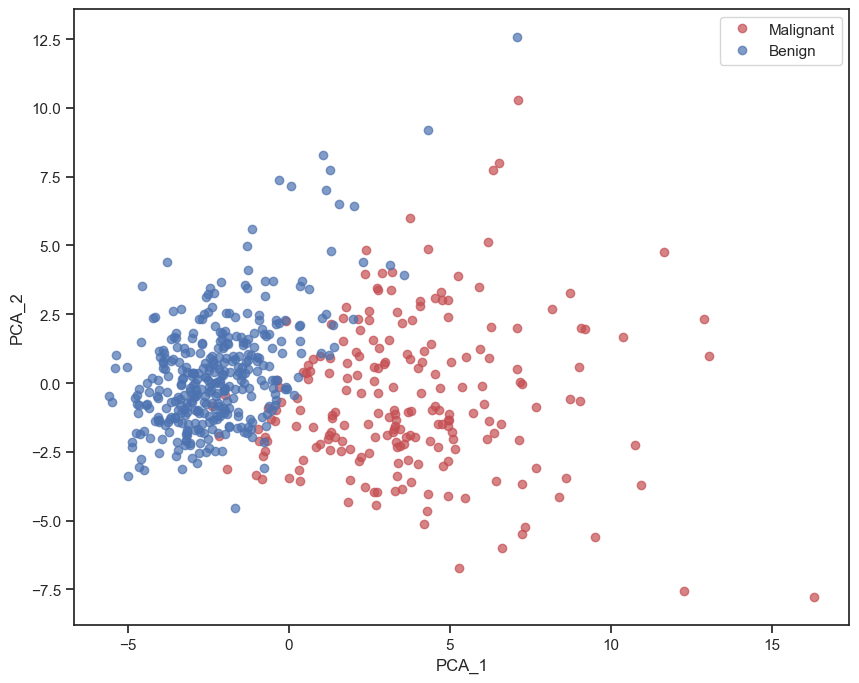

In [125]:
X_pca = pca.transform(X_scale)

PCA_data = pd.DataFrame()

PCA_data['PCA_1'] = X_pca[:,0]
PCA_data['PCA_2'] = X_pca[:,1]

plt.plot(PCA_data['PCA_1'][data.diagnosis == 'M'],PCA_data['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_data['PCA_1'][data.diagnosis == 'B'],PCA_data['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

# IV. Exploratory Data Analysis

## A. Descriptive statistics of dataset

In [49]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [50]:
# Select numerical columns
numerical = data.select_dtypes(include=[float, int])

# Calculate skewness for numerical columns
skewness = numerical.skew()
print(skewness)

radius_mean          0.942380
texture_mean         0.650450
perimeter_mean       0.990650
area_mean            1.645732
smoothness_mean      0.456324
compactness_mean     1.190123
concavity_mean       1.401180
concave_pts_mean     1.171180
symmetry_mean        0.725609
fractal_dim_mean     1.304489
radius_se            3.088612
texture_se           1.646444
perimeter_se         3.443615
area_se              5.447186
smoothness_se        2.314450
compactness_se       1.902221
concavity_se         5.110463
concave_pts_se       1.444678
symmetry_se          2.195133
fractal_dim_se       3.923969
radius_worst         1.103115
texture_worst        0.498321
perimeter_worst      1.128164
area_worst           1.859373
smoothness_worst     0.415426
compactness_worst    1.473555
concavity_worst      1.150237
concave_pts_worst    0.492616
symmetry_worst       1.433928
fractal_dim_worst    1.662579
dtype: float64


In [51]:
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


## B. Visualization of the data to identify patterns and correlations.

<Axes: xlabel='count', ylabel='diagnosis'>

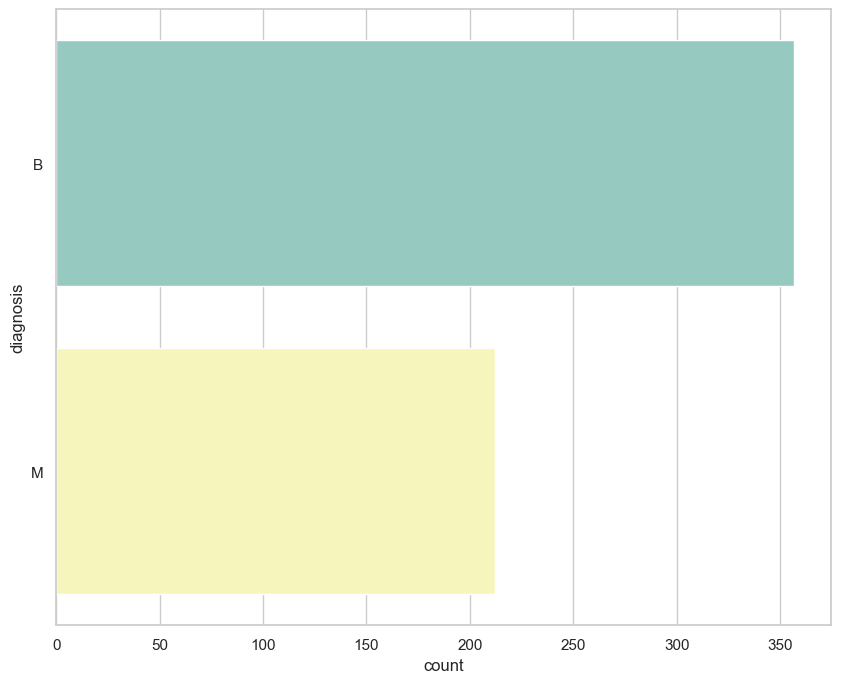

In [52]:
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

In [72]:
mean_columns = data.filter(like='_mean')
se_columns = data.filter(like='_se')
worst_columns = data.filter(like='_worst')

# Merging the selected columns
merged_data = pd.concat([data['diagnosis'], mean_columns, se_columns, worst_columns], axis=1)
# Find the column indices for each group
mean_columns = merged_data.filter(like='_mean').columns
se_columns = merged_data.filter(like='_se').columns
worst_columns = merged_data.filter(like='_worst').columns

# Slicing based on the column indices
data_mean = merged_data[["diagnosis"] + mean_columns.tolist()]
data_se = merged_data[["diagnosis"] + se_columns.tolist()]
data_worst = merged_data[["diagnosis"] + worst_columns.tolist()]

print(mean_columns)
print(se_columns)
print(worst_columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_pts_mean', 'symmetry_mean', 'fractal_dim_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_pts_se', 'symmetry_se',
       'fractal_dim_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_pts_worst', 'symmetry_worst', 'fractal_dim_worst'],
      dtype='object')


### Histogram of _mean variables

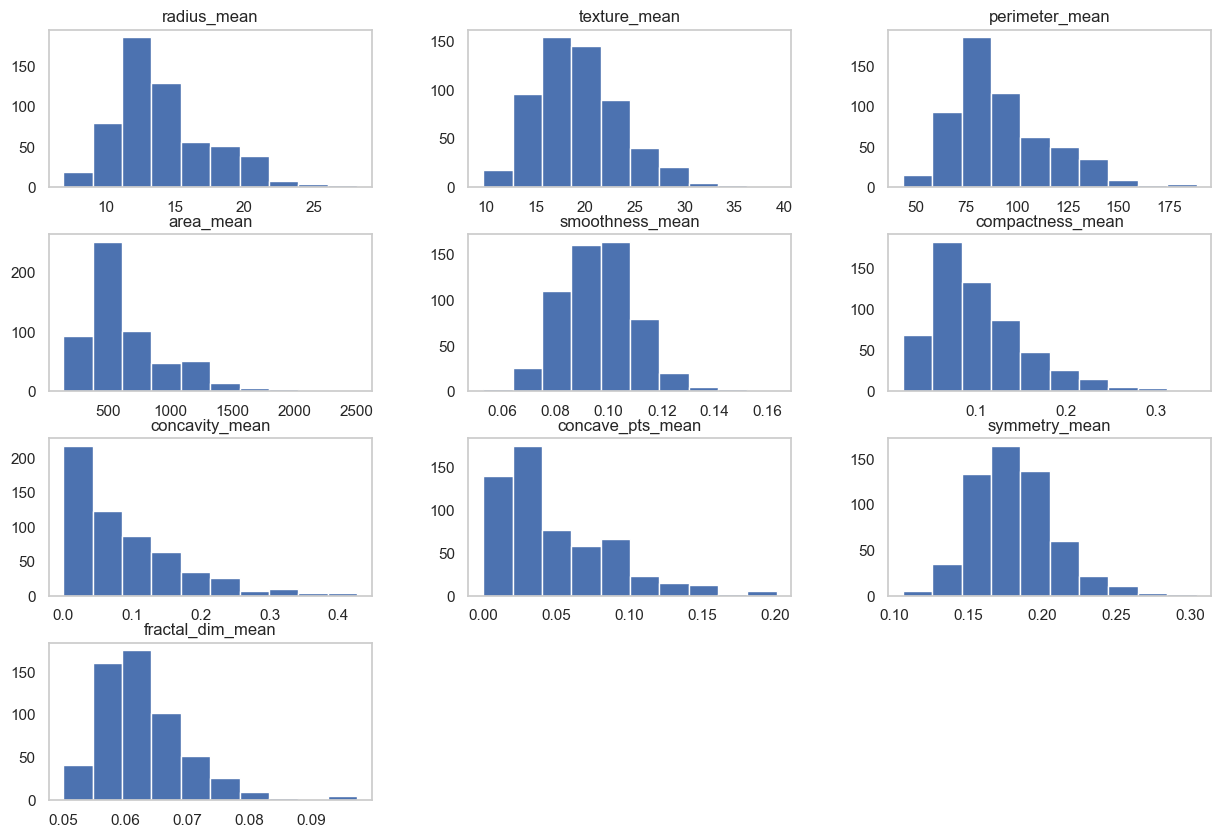

In [54]:
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

### Histogram of _se variables

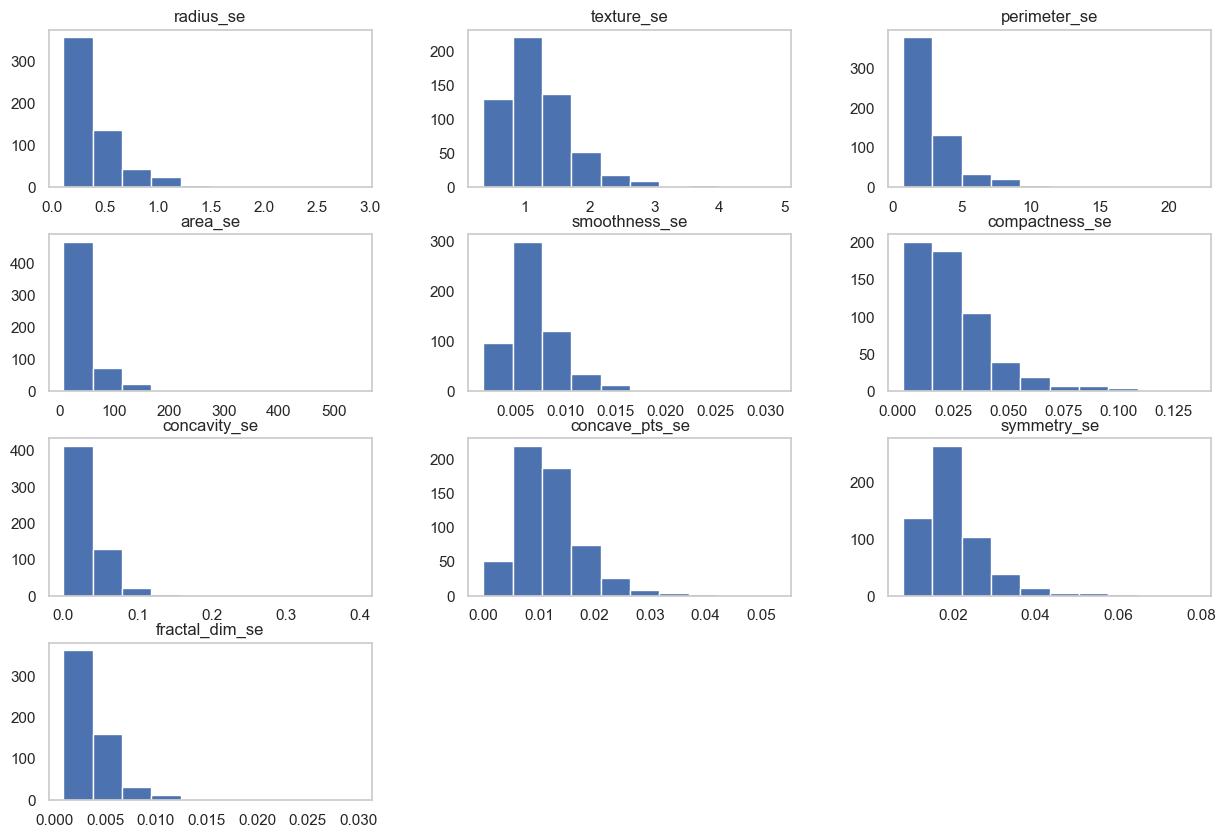

In [55]:
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### Histogram of _worst variables

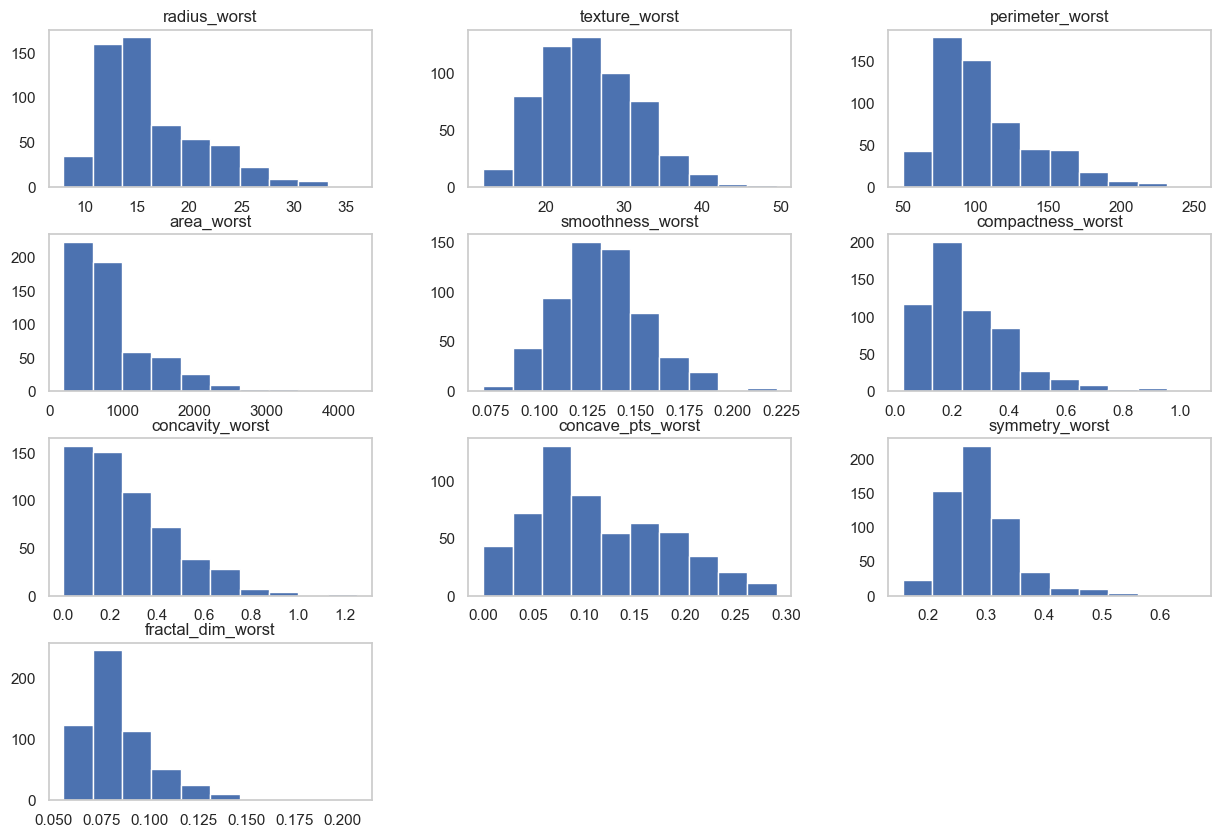

In [56]:
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

### Density plots of _mean variables

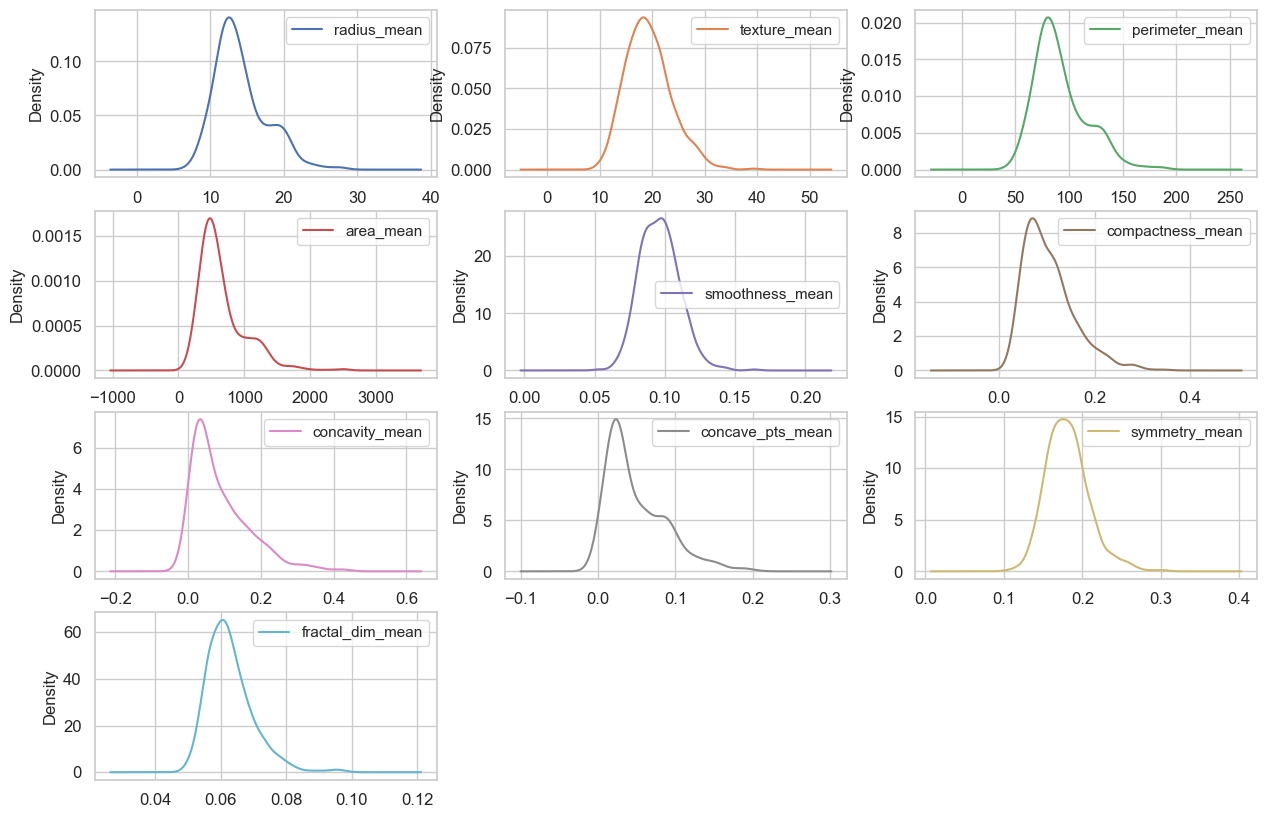

In [57]:
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

### Density plots of _se variables

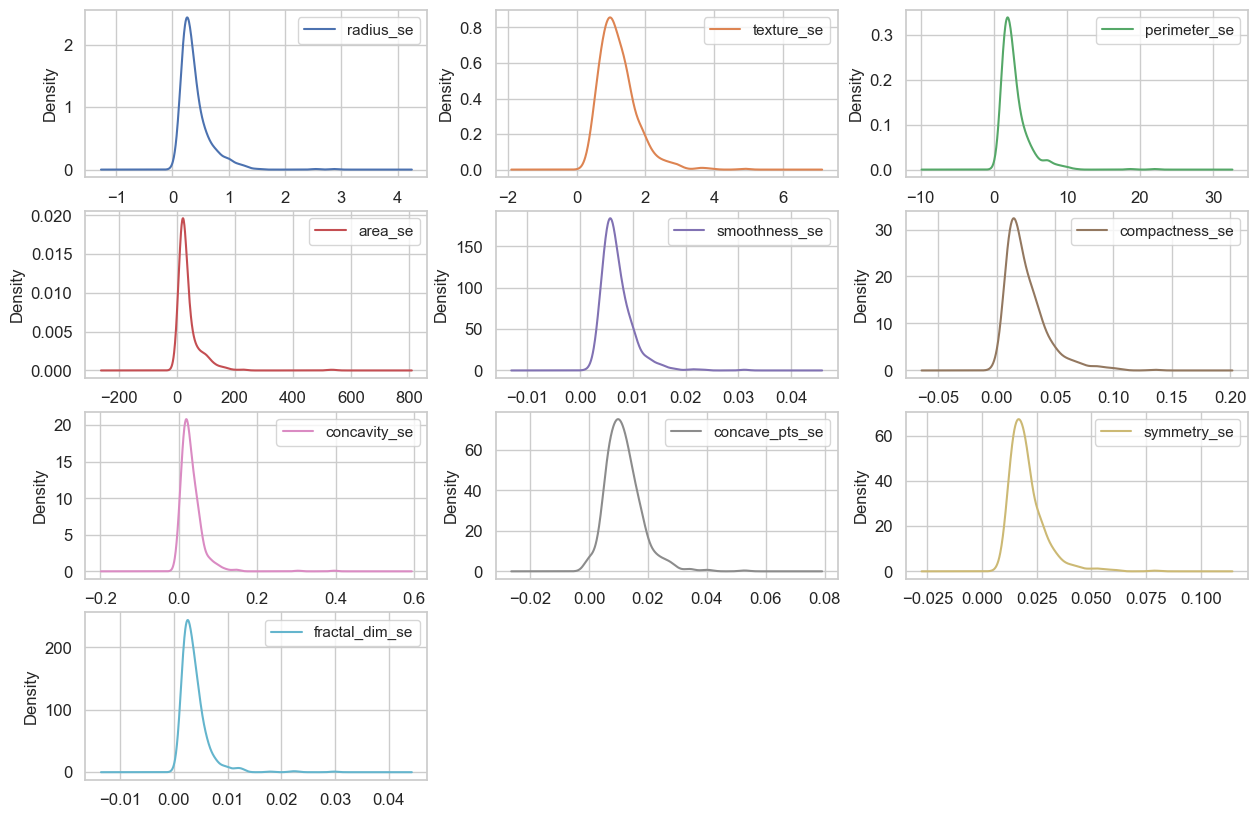

In [58]:
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

### Density plots of _worst variables

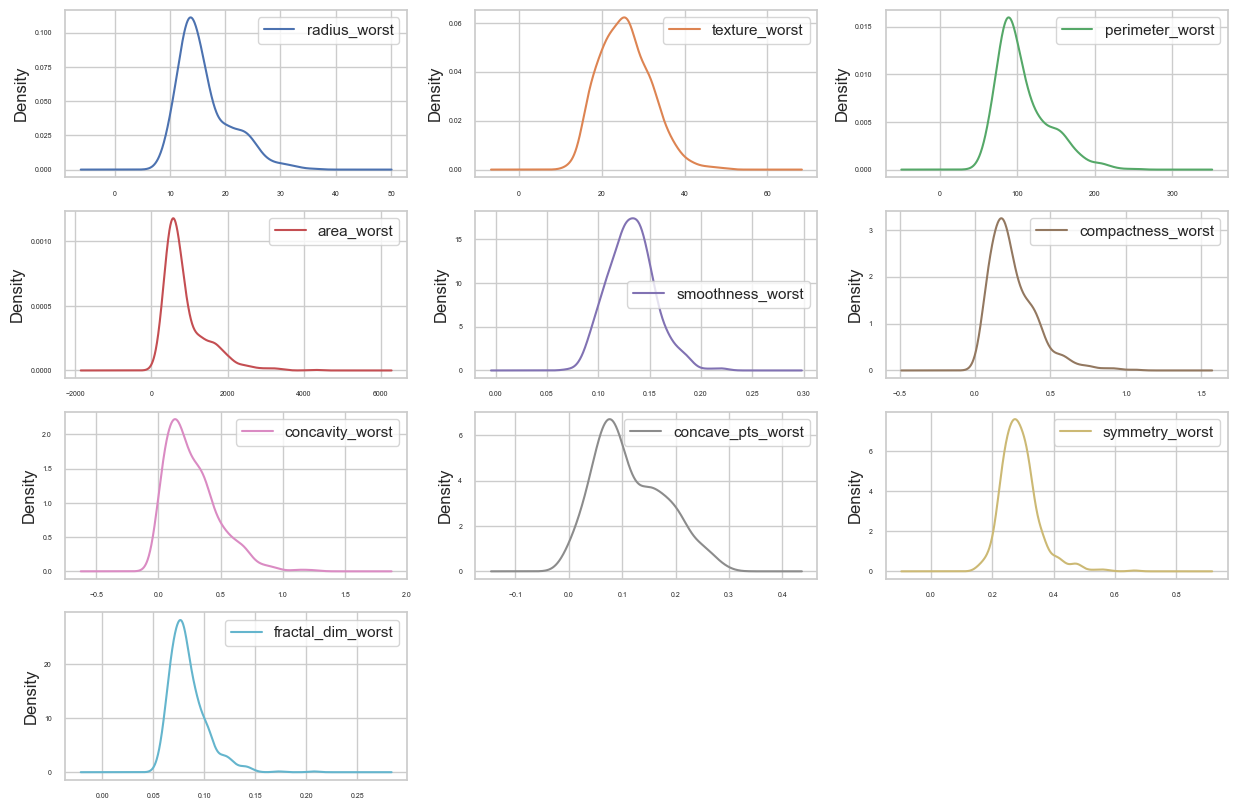

In [59]:
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False, 
                    fontsize=5, figsize=(15,10))

### Correlation matrix

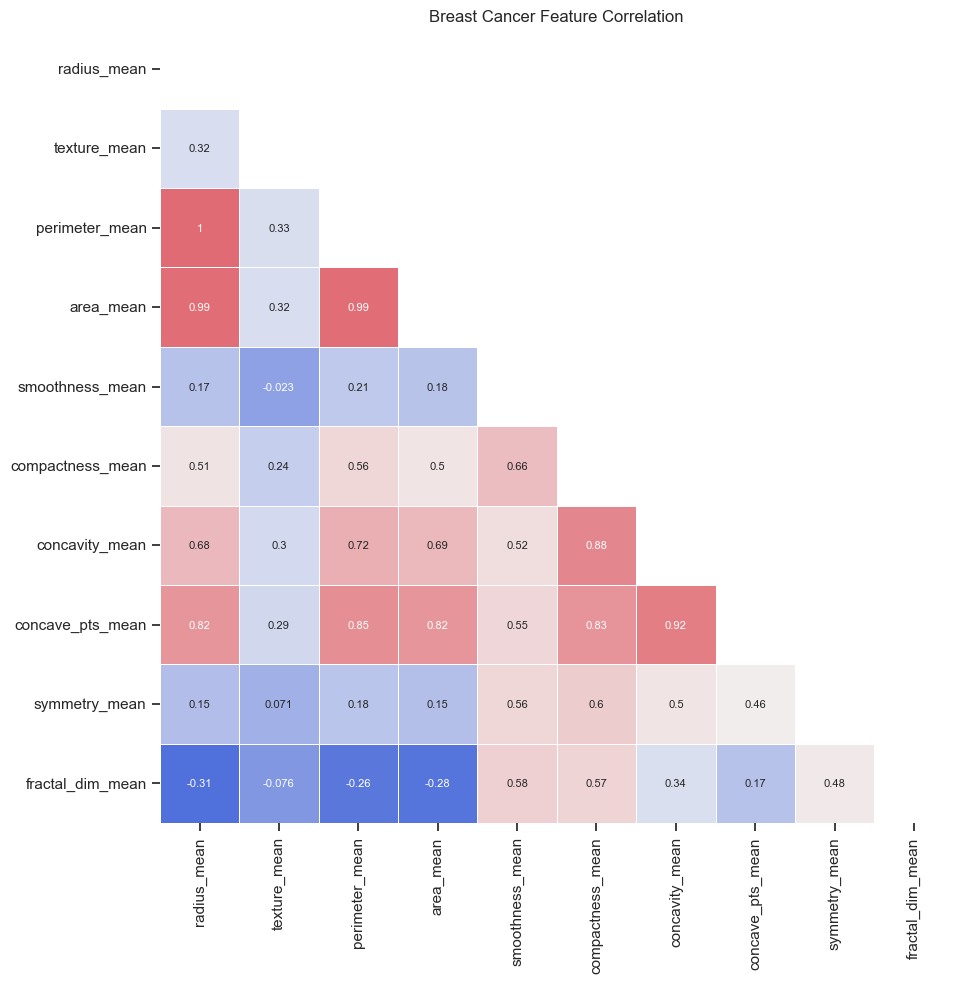

In [66]:
# Exclude non-numeric columns
numeric_mean = data_mean.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with adjusted font size and spacing
sns.heatmap(corr, vmax=1.2, square=True, cmap=cmap, mask=mask, 
            ax=ax, annot=True, fmt='.2g', linewidths=0.5, annot_kws={"size": 8}, cbar=False)

# Set the background color to white
ax.set_facecolor('white')

plt.tight_layout()

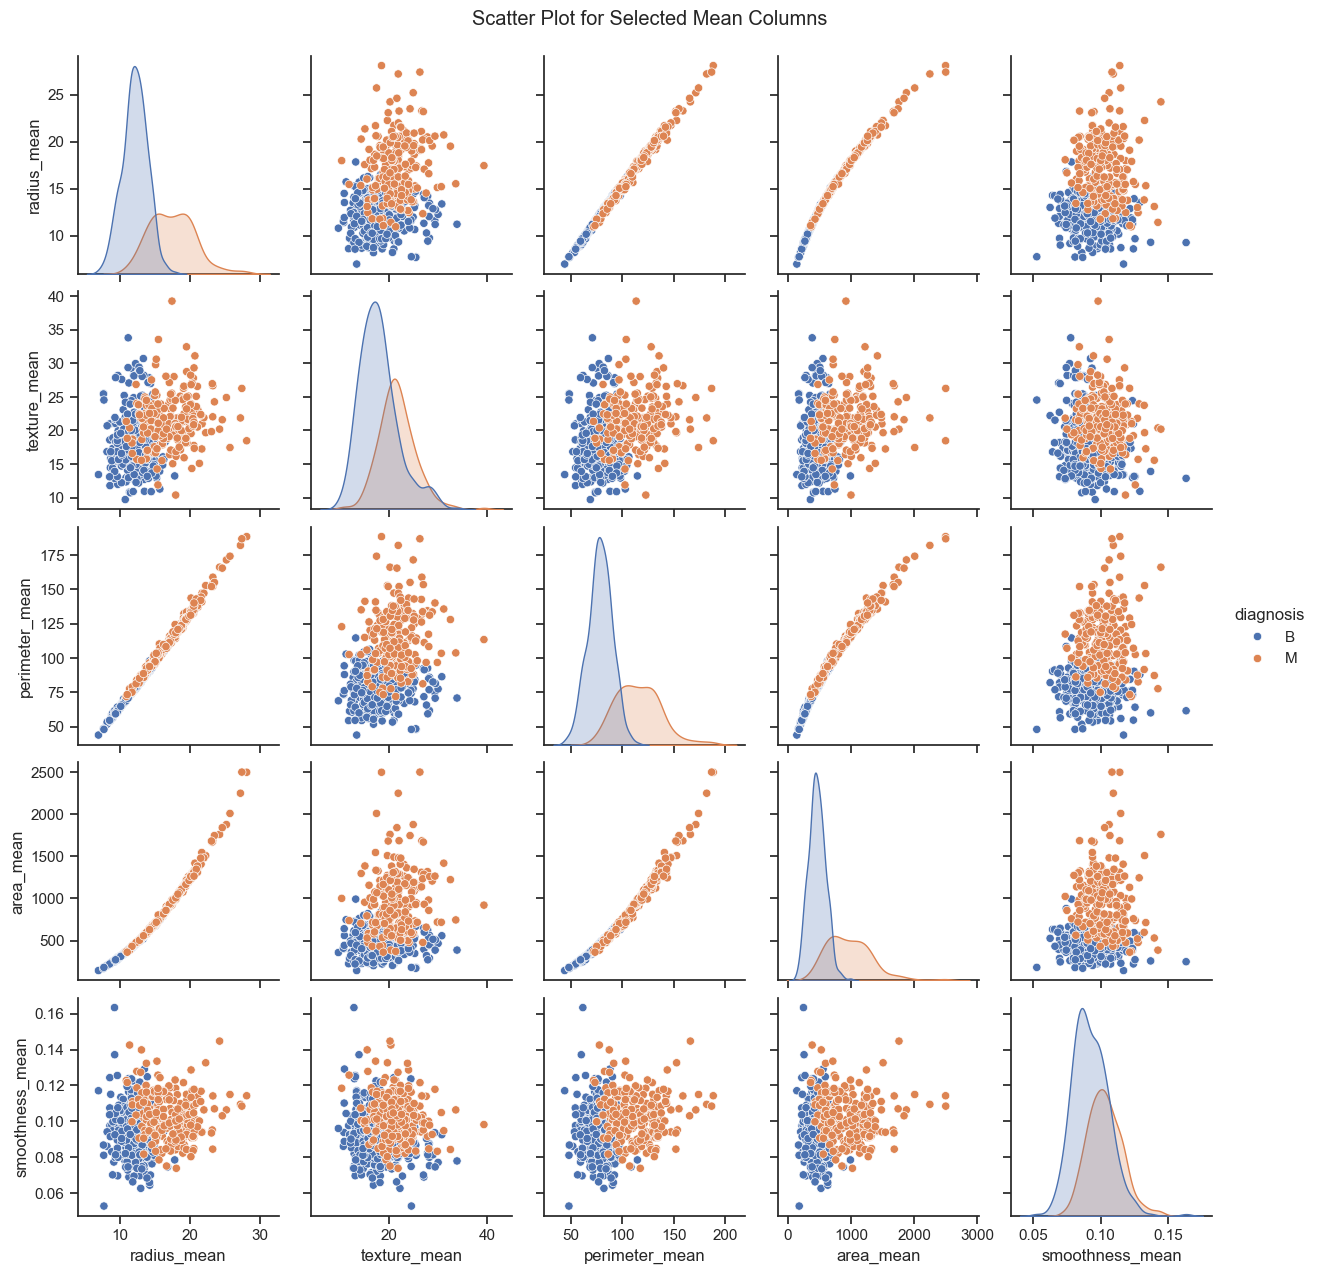

In [80]:
selected_mean_columns = mean_columns[:5]  
sns.set(style="ticks")
g = sns.pairplot(data_mean, hue='diagnosis', vars=selected_mean_columns, diag_kind='kde')
g.fig.suptitle("Scatter Plot for Selected Mean Columns", y=1.02)
plt.show()

# V. Application of classification algorithms to predict breast cancer diagnosis.

In [128]:
data = pd.read_csv('modified_BreastCancerEval.csv', index_col=False)
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
1,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
2,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


In [135]:
array = data.values
X = array[:, 1:]
y = array[:, 0]

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## A. Logistic Regression

In [141]:
lr = LogisticRegression(random_state = 2)

## B.Model Evaluation

### Cross Validation

In [142]:
# Perform cross-validation (e.g., 5-fold cross-validation)
# This returns an array of accuracy scores for each fold
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of the accuracy scores
mean_acc = cv_scores.mean()
std_acc = cv_scores.std()

print("Cross-Validation Results:")
print("Mean Accuracy: {:.2f}%".format(mean_acc * 100))
print("Standard Deviation: {:.2f}".format(std_acc))

# Train the model on the entire training set
lr.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model on the test set: {:.2f}%".format(acc * 100))

Cross-Validation Results:
Mean Accuracy: 97.99%
Standard Deviation: 0.01
Accuracy of the model on the test set: 97.66%


### Evaluation Metrics

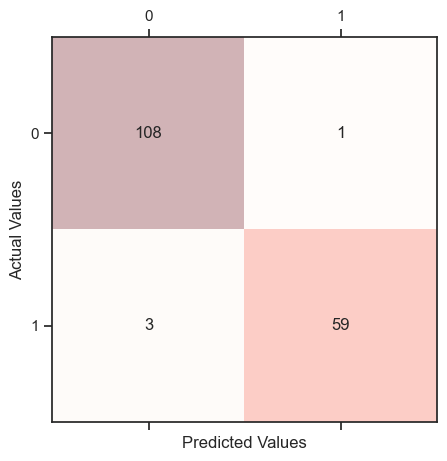

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


In [147]:
%matplotlib inline
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))